In [1]:
import pandas as pd
from pathlib import Path
import json

df = pd.DataFrame(columns=["filename", "title", "text", "metadata"])

idx = 0
for path in Path("../pdf-reports/plaintext").iterdir():
    if path.suffix == '.json':
        with path.open() as json_file:
            parsed = json.load(json_file)
            filename = path.stem
            
            # Some documents do not have title among metadata.
            title = parsed["metadata"]["title"] if "title" in parsed["metadata"].keys() else filename
            
            df.loc[idx] = [filename, title, parsed["content"], parsed["metadata"]]
            idx += 1

df.head()

,filename,title,text,metadata
0,8th-enisa-workshop-certs-in-europe-report,8th ENISA Workshop ‘CERTs in Europe’,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,{'title': '8th ENISA Workshop ‘CERTs in Europe...
1,a-collection-of-good-practice-for-cert-quality...,,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"{'title': ' ', 'dc:format': 'application/pdf; ..."
2,a-security-analysis-of-next-generation-web-sta...,a-security-analysis-of-next-generation-web-sta...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"{'dc:format': 'application/pdf; version=1.5', ..."
3,actionable-information-for-security,actionable-information-for-security,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"{'dc:format': 'application/pdf; version=1.5', ..."
4,algorithms-key-size-and-parameters-report-2014,algorithms-key-size-and-parameters-report-2014,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"{'creator': 'Rodica Tirtea', 'access_permissio..."


In [2]:
import re

def remove_url(s):
    return re.sub(r'http\S+', '', s, flags=re.MULTILINE)

print(remove_url("Hello https://a72d304c643b011e8b84c061e85c3662-550367788.eu-west-3.elb.amazonaws.com/ world!"))

Hello  world!


In [3]:
import re

def strip_tags(s):
    """Basic regexp based HTML / XML tag stripper function
    For serious HTML/XML preprocessing you should rather use an external
    library such as lxml or BeautifulSoup.
    """
    s = re.compile(r"<([^>]+)>", flags=re.UNICODE).sub(" ", s)
    #s = re.compile(r"\&\w+\;").sub(" ", s)
    s = re.compile(r"\&[^ ]+\;").sub(" ", s)
    return s

print(strip_tags("<p>Hello &nbsp; &#039; world!</p>"))

 Hello     world! 


In [4]:
from sklearn.feature_extraction import stop_words
 
print(stop_words.ENGLISH_STOP_WORDS)

frozenset({'hasnt', 'former', 'along', 'into', 'become', 'down', 'six', 'although', 'or', 'many', 'three', 'least', 'thru', 'off', 'will', 'around', 'nor', 'you', 'once', 'per', 'five', 'your', 'which', 'why', 'towards', 'was', 'ours', 'some', 'etc', 'anyway', 'may', 'serious', 'formerly', 'system', 'below', 'a', 'find', 'became', 'above', 'with', 'thereby', 'moreover', 'still', 'thereafter', 'seems', 'cant', 'mostly', 'several', 'across', 'of', 'be', 'if', 'itself', 'thereupon', 'here', 'being', 'whither', 'hereupon', 'no', 'cannot', 'and', 'name', 'amoungst', 'whereby', 'amount', 'meanwhile', 'otherwise', 'therefore', 'other', 'herself', 'becoming', 'twelve', 'hence', 'anywhere', 'never', 'our', 'ever', 'put', 'we', 'yet', 'after', 'his', 'whenever', 'both', 'neither', 'sometime', 'fill', 'sometimes', 'fire', 'even', 'throughout', 'their', 'un', 'top', 'rather', 'de', 'myself', 'thin', 'onto', 'own', 'move', 'hers', 'one', 'always', 'indeed', 'ourselves', 'them', 'thus', 'elsewhere',

In [5]:
def preproc(s):
    return strip_tags(remove_url(s)).lower()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(preprocessor=preproc, stop_words='english')
#                     tokenizer=porter)
tv

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function preproc at 0x1a133d8bf8>, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [7]:
from time import time

t0 = time()
scores = tv.fit_transform(df['text'])
print("done in %0.3fs." % (time() - t0))
scores

done in 6.870s.


<351x148988 sparse matrix of type '<class 'numpy.float64'>'
	with 778972 stored elements in Compressed Sparse Row format>

In [8]:
import numpy as np

freq_pairs = list(zip(tv.get_feature_names(), np.asarray(scores.mean(axis=0)).ravel()))
sorted(freq_pairs, key = lambda x: x[1], reverse=True)[:100]

[('security', 0.12274187510674892),
 ('information', 0.089185736055127043),
 ('data', 0.071549685880362993),
 ('enisa', 0.052298792230130307),
 ('cyber', 0.051626586134001014),
 ('services', 0.038552772970807329),
 ('eu', 0.035681493004096669),
 ('network', 0.035205768768914673),
 ('national', 0.035127472299809864),
 ('incident', 0.033974902492213258),
 ('european', 0.032295948277735076),
 ('service', 0.032285938915142497),
 ('cert', 0.030740525103771576),
 ('csirt', 0.029321322930274084),
 ('systems', 0.029096642076637199),
 ('privacy', 0.028732498181782456),
 ('certs', 0.028443989503235779),
 ('use', 0.028350724310972627),
 ('management', 0.028123993243238769),
 ('level', 0.026480916472532767),
 ('cloud', 0.026128393782981124),
 ('risk', 0.025789938972273274),
 ('incidents', 0.02462481602518056),
 ('used', 0.023721116317653657),
 ('trust', 0.023629016230256393),
 ('protection', 0.022415296872590987),
 ('report', 0.022104351574296858),
 ('public', 0.021849536900750106),
 ('electronic'

In [9]:
tv2 = TfidfVectorizer(ngram_range=(2, 2), preprocessor=preproc, stop_words='english')
tv2

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), norm='l2',
        preprocessor=<function preproc at 0x1a133d8bf8>, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [10]:
t0 = time()
scores2 = tv2.fit_transform(df['text'])
print("done in %0.3fs." % (time() - t0))
scores2

done in 22.444s.


<351x1642288 sparse matrix of type '<class 'numpy.float64'>'
	with 2593852 stored elements in Compressed Sparse Row format>

In [11]:
freq_pairs = list(zip(tv2.get_feature_names(), np.asarray(scores2.mean(axis=0)).ravel()))
sorted(freq_pairs, key = lambda x: x[1], reverse=True)[:100]

[('cyber security', 0.027504069532245701),
 ('information security', 0.019757270777479609),
 ('personal data', 0.016518858305781665),
 ('member states', 0.015961782243552089),
 ('trust service', 0.015225059556008893),
 ('data protection', 0.012941438859487616),
 ('national governmental', 0.01220796547375049),
 ('information sharing', 0.012207329016209715),
 ('network information', 0.01132370931294017),
 ('trust services', 0.011280914855677709),
 ('article 13a', 0.011028295585806567),
 ('2013 page', 0.01055619135337525),
 ('security measures', 0.0099927044934975395),
 ('2014 page', 0.0099582159156654509),
 ('cert d1', 0.0099019590979018898),
 ('december 2016', 0.0096146019775009608),
 ('d1 d2', 0.0093713720882291317),
 ('cloud computing', 0.0093370591303049023),
 ('service providers', 0.0092524175196367492),
 ('wp2006 cert', 0.008875764169737831),
 ('smart grid', 0.008802223136783794),
 ('incident reporting', 0.0087473131514363804),
 ('qualified trust', 0.0086732169336168532),
 ('big da

In [12]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=1000)
wordcloud.generate_from_frequencies(dict(freq_pairs));

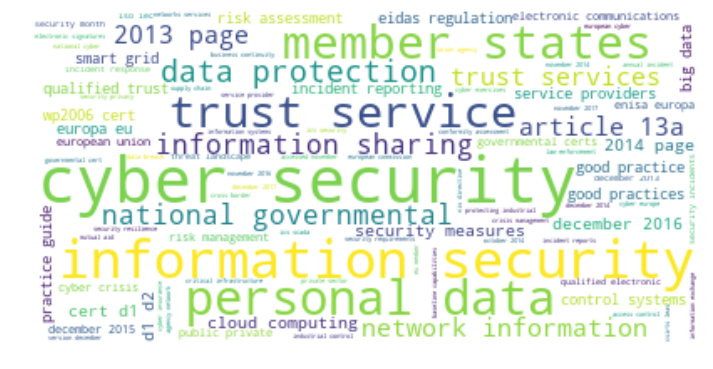

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()